In [20]:
import numpy as np
import math

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.ibmq import least_busy
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-08-26 16:01:41,912: Credentials are already in use. The existing account in the session will be replaced.


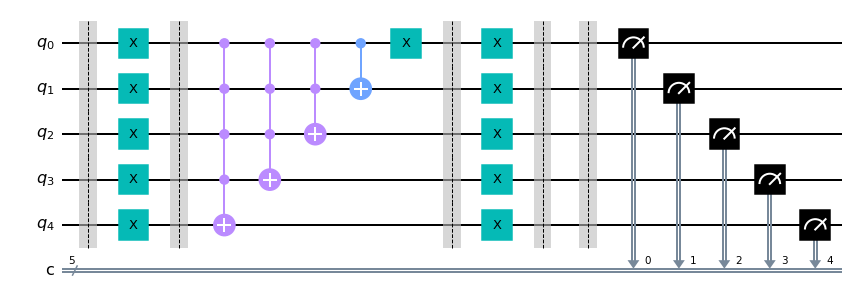

In [29]:
cdec = QuantumCircuit(5,5)

cdec.barrier()
for i in range(5):
    cdec.x(i)

cdec.barrier()

cdec.mct([0,1,2,3],4)
cdec.mct([0,1,2],3)
cdec.ccx(0,1,2)
cdec.cx(0,1)
cdec.x(0)

cdec.barrier()
for i in range(5):
    cdec.x(i)

cdec.barrier()

cdec.save_statevector()

for i in range(5):
    cdec.measure(i,i)
cdec.draw()

In [30]:
# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
cdec = transpile(cdec, simulator)

# Run and get statevector
result = simulator.run(cdec).result()
statevector = result.get_statevector(cdec)
#plot_state_qsphere(statevector)
print(statevector)

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2, 2, 2, 2))
